In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
BankData = pd.read_csv('/content/drive/MyDrive/ML Assignments/41149_B3/Churn_Modelling.csv')
BankDataCopy = BankData.copy()
BankDataCopy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
BankDataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
BankDataCopy.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
BankDataCopy.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
BankDataCopy.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
BankDataCopy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
BankDataCopy['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
BankDataCopy['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
LabEnc = LabelEncoder()
BankDataCopy['Geography'] = LabEnc.fit_transform(BankDataCopy['Geography'])
BankDataCopy['Gender'] = LabEnc.fit_transform(BankDataCopy['Gender'])
BankDataCopy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
x = BankDataCopy.drop('Exited', axis = 1)
y = BankDataCopy['Exited']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
pd.DataFrame(data = x_train, columns = BankDataCopy.drop('Exited', axis = 1).columns)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.719980,-0.904571,0.917769,1.256181,0.683089,-1.228601,-0.910949,0.642621,0.983339,-1.480501
1,-0.753272,-0.904571,-1.089599,-0.659527,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.565230
2,0.575745,1.514931,-1.089599,0.394112,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.182108
3,1.791436,-0.904571,0.917769,0.585683,-0.704082,0.844319,-0.910949,-1.556128,-1.016944,-0.692551
4,-1.577469,-0.904571,0.917769,-0.659527,1.029882,-1.228601,0.800932,0.642621,-1.016944,-0.567289
...,...,...,...,...,...,...,...,...,...,...
7495,-0.299964,0.305180,0.917769,0.777254,0.683089,0.493838,-0.910949,0.642621,0.983339,-0.577104
7496,0.349091,0.305180,-1.089599,2.309820,-0.704082,0.074833,-0.910949,0.642621,-1.016944,-0.527712
7497,0.225462,-0.904571,-1.089599,0.585683,1.376675,-1.228601,-0.910949,0.642621,0.983339,-0.138963
7498,0.132740,-0.904571,-1.089599,0.010971,1.029882,-1.228601,0.800932,0.642621,0.983339,0.019792


In [17]:
neuralNetworkModel = keras.Sequential([
    keras.layers.Dense(13, input_shape = (10,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(7, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

neuralNetworkModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

neuralNetworkModel.fit(x_train, y_train, epochs = 100)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.7989
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8103
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8264
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8413
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8472
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8545
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8564
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8555
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8568
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3511 - accura

In [18]:
neuralNetworkModel.evaluate(x_test, y_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8584


[0.3450854420661926, 0.8583999872207642]

In [25]:
y_real_pred = neuralNetworkModel.predict(x_test)

79/79 [==============================] - 0s 1ms/step


In [27]:
y_pred = []
for pred in y_real_pred:
  if pred >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
y_pred[:5]

[0, 0, 0, 0, 0]

Text(69.0, 0.5, 'Actual')

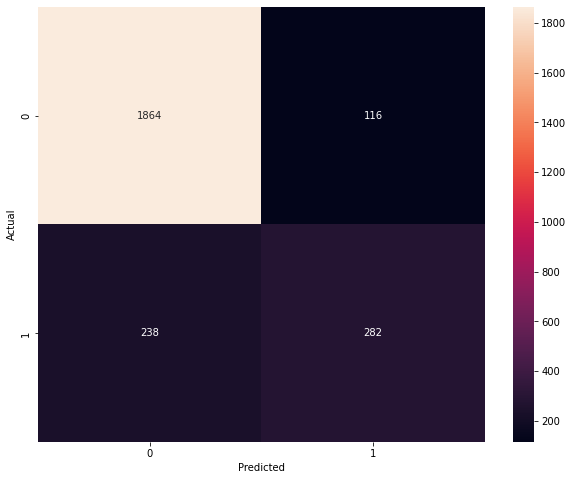

In [29]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')